Importing Packages

In [2]:
pip install nltk

In [1]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set()

ModuleNotFoundError: No module named 'nltk'

Load the datasets

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [3]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [4]:
sample_submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


Value counts for the sentiments column

In [5]:
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

# TEXT CLEANING

Convert the 'message' column into lower case

In [6]:
train['message'] = train['message'].str.lower()
test['message'] = test['message'].str.lower()

Remove punctuation

In [7]:
import string
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])
train['message'] = train['message'].apply(remove_punctuation)
test['message'] = test['message'].apply(remove_punctuation)
test['message'].iloc[2]

'the scary unimpeachable evidence that climate change is already here httpstcoyaedqcv9ki itstimetochange climatechange zeroco2'

Tokenization

In [8]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
train['tokens'] = train['message'].apply(tokeniser.tokenize)
test['tokens'] = test['message'].apply(tokeniser.tokenize)
test['tokens'].iloc[2]

['the',
 'scary',
 'unimpeachable',
 'evidence',
 'that',
 'climate',
 'change',
 'is',
 'already',
 'here',
 'httpstcoyaedqcv9ki',
 'itstimetochange',
 'climatechange',
 'zeroco2']

Stemming

In [10]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
stemmer = SnowballStemmer('english')
def message_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

train['stem'] = train['tokens'].apply(message_stemmer, args=(stemmer, ))
test['stem'] = test['tokens'].apply(message_stemmer, args=(stemmer, ))


In [11]:
# print out the stemmed words from the test dataframe

for i, t in enumerate(train.iloc[2]['tokens']):
    print ('{:20s} --> {:10s}'.format(t, train.iloc[2]['stem'][i]))

rt                   --> rt        
rawstory             --> rawstori  
researchers          --> research  
say                  --> say       
we                   --> we        
have                 --> have      
three                --> three     
years                --> year      
to                   --> to        
act                  --> act       
on                   --> on        
climate              --> climat    
change               --> chang     
before               --> befor     
it                   --> it        
’                    --> ’         
s                    --> s         
too                  --> too       
late                 --> late      
httpstcowdt0kdur2f   --> httpstcowdt0kdur2f
httpstcoz0anpt…      --> httpstcoz0anpt…


In [12]:
# print out the stemmed words from the test dataframe

for i, t in enumerate(test.iloc[2]['tokens']):
    print ('{:20s} --> {:10s}'.format(t, test.iloc[2]['stem'][i]))

the                  --> the       
scary                --> scari     
unimpeachable        --> unimpeach 
evidence             --> evid      
that                 --> that      
climate              --> climat    
change               --> chang     
is                   --> is        
already              --> alreadi   
here                 --> here      
httpstcoyaedqcv9ki   --> httpstcoyaedqcv9ki
itstimetochange      --> itstimetochang
climatechange        --> climatechang
zeroco2              --> zeroco2   


Remove stopwords

In [13]:
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

def remove_stop_words(tokens):
    return [t for t in tokens if t not in stopwords.words('english')]

train['no_stopwords'] = train['tokens'].apply(remove_stop_words)

In [15]:
train['no_stopwords'].iloc[2]

['rt',
 'rawstory',
 'researchers',
 'say',
 'three',
 'years',
 'act',
 'climate',
 'change',
 '’',
 'late',
 'httpstcowdt0kdur2f',
 'httpstcoz0anpt…']

In [24]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [ ]:
personality = {}
for pp in type_labels:
    df = all_mbti.groupby('type')
    personality[pp] = {}
    for row in df.get_group(pp)['tokens']:
        personality[pp] = bag_of_words_count(row, personality[pp])
    print(personality)

In [25]:
type_labels = list(train.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


In [26]:
personality = {}
for pp in type_labels:
    df = train.groupby('sentiment')
    personality[pp] = {}
    for row in df.get_group(pp)['tokens']:
        personality[pp] = bag_of_words_count(row, personality[pp])
    print(personality)

{1: {'polyscimajor': 1, 'epa': 277, 'chief': 67, 'doesnt': 718, 'think': 234, 'carbon': 98, 'dioxide': 35, 'is': 2842, 'main': 25, 'cause': 108, 'of': 2604, 'global': 1596, 'warming': 1424, 'and': 1888, 'wait': 25, 'what': 358, 'httpstcoyelvcefxkc': 1, 'via': 183, 'mashable': 19, 'its': 530, 'not': 676, 'like': 273, 'we': 1211, 'lack': 15, 'evidence': 73, 'anthropogenic': 10, 'todayinmaker': 1, 'wired': 16, '2016': 53, 'was': 210, 'a': 2684, 'pivotal': 3, 'year': 81, 'in': 2421, 'the': 4783, 'war': 57, 'on': 1361, 'climate': 7356, 'change': 6991, 'httpstco44wotxtlcd': 1, 'rt': 5796, 'soynoviodetodas': 1, 'racist': 30, 'sexist': 12, 'denying': 121, 'bigot': 6, 'leading': 60, 'polls': 4, 'electionnight': 10, 'worth': 12, 'read': 69, 'whether': 33, 'you': 926, 'do': 326, 'or': 221, 'dont': 341, 'believe': 1001, 'httpstcogglzvnyjun': 1, 'httpstco7afe2mah8j': 1, 'thenation': 1, 'mike': 8, 'pence': 13, 'doesn': 12, '’': 430, 't': 94, 'that': 964, 'smoking': 5, 'causes': 40, 'lung': 1, 'cance

In [27]:
all_words = set()
for pp in type_labels:
    for word in personality[pp]:
        all_words.add(word)
print(all_words)

{'httpstco55qcceiitg', 'cute', 'httpstcodummgcusaa', 'sowmiyashok', 'activism', 'httpstcop1hã¢â‚¬â¦', 'twizler557', 'edyong209', 'willrworley', 'photos', 'middleclass', 'onion', 'httpstcok1njjzzue8', 'grandad', 'cheapgames', 'experts…', 'scapegoate…', 'httpstcokpgqgouo3k', 'psychcardiffuni', 'shitlords', 'thoughtful', 'httpstco3qrtxnuhof', 'memos', 'httpstcody2bljqjut', 'chequewhat', 'epekto', 'ancestral', 'controversies', 'httpstcoeqbga6wqnq', 'rising', 'dikutub', 'tur…', 'phones', 'httpstcowu9w4vmkng', 'having', 'httpstcoeglgq5ykte', 'httpstcooh8tuct4jv', 'accident', 'patterns', 'httpstcot8xqezx4ym', 'proactive', 'starbucks', 'annotation', 'issues…', 'greenville', 'twenty', 'newshub', 'httpstco9jqcdfflrj', 'httpstco2p5s5k1ova', 'coastlines', 'shipp…', 'environ…', 'httpstcohxdjqwgbe5', 'cnnisisis', 'islandphone', 'senatormroberts', 'unfccc', 'httpstcoi97lt3v8zl', 'fareedzakaria', 'httpstco7ba3rbohk9', 'tied', 'smilleesims', 'members', 'hollande', 'deindustrialization', 'tcmargate', 'h

In [28]:
personality['all'] = {}
for pp in type_labels:
    for word in all_words:
        if word in personality[pp].keys():
            if word in personality['all']:
                personality['all'][word] += personality[pp][word]
            else:
                personality['all'][word] = personality[pp][word]
print(personality['all'])

{'httpstco55qcceiitg': 1, 'cute': 5, 'activism': 2, 'edyong209': 4, 'photos': 17, 'onion': 1, 'httpstcok1njjzzue8': 1, 'grandad': 1, 'experts…': 1, 'scapegoate…': 1, 'thoughtful': 2, 'httpstcody2bljqjut': 1, 'chequewhat': 1, 'ancestral': 1, 'httpstcoeqbga6wqnq': 1, 'rising': 58, 'tur…': 1, 'phones': 4, 'having': 49, 'httpstcoeglgq5ykte': 1, 'accident': 3, 'patterns': 6, 'httpstcot8xqezx4ym': 1, 'proactive': 1, 'starbucks': 2, 'annotation': 1, 'greenville': 1, 'twenty': 1, 'httpstco9jqcdfflrj': 1, 'coastlines': 3, 'islandphone': 1, 'senatormroberts': 13, 'unfccc': 6, 'httpstcoi97lt3v8zl': 1, 'fareedzakaria': 1, 'tied': 9, 'smilleesims': 1, 'members': 7, 'hollande': 2, 'httpstco64zawud3yq': 1, 'aw': 1, 'helll': 1, 'plot': 8, 'httpstcoividgi78nd': 1, 'httpstcorettnbpyq5': 1, 'sweeping': 13, 'yep': 4, 'layer': 1, 'shadbase': 2, 'reaching': 6, 'indoor': 1, 'mariongroves': 1, 'overlooked': 3, 'remarks': 6, 'digging': 1, 'httpstcomigvubrgrx': 1, 'httpstcod1quthkqma': 1, 'httpstcooyo9tpg1m2': 

In [29]:
total_words = sum([v for v in personality['all'].values()])
total_words

280459

Text(0.5, 0, 'word frequency')

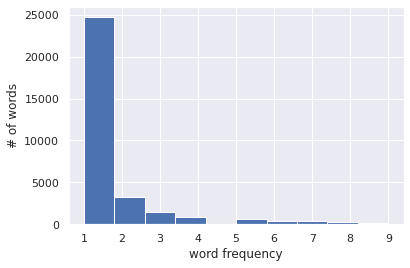

In [30]:
_ = plt.hist([v for v in personality['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency")

In [31]:
len([v for v in personality['all'].values() if v == 1])

24706

In [32]:
rare_words = [k for k, v in personality['all'].items() if v==1]
print(rare_words[:100])

['httpstco55qcceiitg', 'onion', 'httpstcok1njjzzue8', 'grandad', 'experts…', 'scapegoate…', 'httpstcody2bljqjut', 'chequewhat', 'ancestral', 'httpstcoeqbga6wqnq', 'tur…', 'httpstcoeglgq5ykte', 'httpstcot8xqezx4ym', 'proactive', 'annotation', 'greenville', 'twenty', 'httpstco9jqcdfflrj', 'islandphone', 'httpstcoi97lt3v8zl', 'fareedzakaria', 'smilleesims', 'httpstco64zawud3yq', 'aw', 'helll', 'httpstcoividgi78nd', 'httpstcorettnbpyq5', 'layer', 'indoor', 'mariongroves', 'digging', 'httpstcomigvubrgrx', 'httpstcod1quthkqma', 'httpstcooyo9tpg1m2', 'foresight', 'planning…', 'boulder', 'yes2renewables', 'httpstcojbmzz8wooj', '😍😌', 'milesking10', 'weathet', 'd18olson', 'sorrow', 'gooã¢â‚¬â¦', 'doesin', 'illustration', 'httpstco4hxlyybzba', 'httpstcoe2omdbpui3', 'dã¢â‚¬â¦', 'httpstco814lpgy6wj', 'reinforced', 'weapon…', 'tw…', 'gt170', 'httpstcoydgshykusq', 'whaaaaa', 'httpstcouszv0jlruu', 'clerk', 'paulpolman', 'bodykeep', 'httpstcosifqd96stp', 'yardleylat', 'alr…', 'bulldoze', 'socialgood', 

In [33]:
# how many words appear more than 10 times?
# how many words of the total does that account for?
print(len([v for v in personality['all'].values() if v >= 10]))
occurs_more_than_10_times = sum([v for v in personality['all'].values() if v >= 10])
print(occurs_more_than_10_times)

2497
229690


In [34]:
occurs_more_than_10_times/total_words

0.818978888179734

In [35]:
max_count = 10
remaining_word_index = [k for k, v in personality['all'].items() if v > max_count]

In [36]:
hm = []
for p, p_bow in personality.items():
    df_bow = pd.DataFrame([(k, v) for k, v in p_bow.items() if k in remaining_word_index], columns=['Word', p])
    df_bow.set_index('Word', inplace=True)
    hm.append(df_bow)

# create one big dataframe
df_bow = pd.concat(hm, axis=1)
df_bow.fillna(0, inplace=True)

In [37]:
df_bow 

,1,2,0,-1,all
Word,,,,,
epa,277.0,254.0,29.0,16.0,576
chief,67.0,100.0,5.0,5.0,177
doesnt,718.0,21.0,53.0,20.0,812
think,234.0,16.0,81.0,29.0,360
carbon,98.0,79.0,12.0,15.0,204
...,...,...,...,...,...
alarmists,0.0,0.0,0.0,21.0,21
countermoonbat,0.0,0.0,0.0,16.0,16
fakeã¢â‚¬â¦,0.0,0.0,0.0,12.0,12


count vectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(train['message'])

CountVectorizer()

In [39]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

In [40]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

In [41]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

In [42]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

In [43]:
betterVect = CountVectorizer(stop_words='english',
                             min_df=2,
                             max_df=0.5,
                             ngram_range=(1, 1))

In [45]:
features = betterVect.fit(train['message'])
pd.DataFrame(
    features.todense(),
    columns=betterVect.get_feature_names()
)

AttributeError: ignored

In [ ]:
vect = CountVectorizer(min_df=0., max_df=1.0)
X = vect.fit_transform(train['message'])
from pandas import DataFrame
print(DataFrame(X.A, columns=vect.get_feature_names()).to_string())

In [48]:
features1 = betterVect.fit_transform(train['message'])
count_vect_df = pd.DataFrame(features1.todense(), columns=betterVect.get_feature_names())
count_vect_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1000,100000,1000s,100s,101,105,109c,10yrs,...,ëœnothing,ëœthereã,ëœâ,ëœå,ëœæ,ëœï,œâ,šã,žã,อง
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
pd.concat([train, count_vect_df], axis=1)

,sentiment,message,tweetid,tokens,stem,no_stopwords,10,100,1000,100000,...,ëœnothing,ëœthereã,ëœâ,ëœå,ëœæ,ëœï,œâ,šã,žã,อง
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evidence, anthropogenic, global, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstori, research, say, we, have, three,...","[rt, rawstory, researchers, say, three, years,...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[todayinmaker, wired, 2016, pivotal, year, war...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, its, 2016, and, a, racis...","[rt, soynoviodetoda, it, 2016, and, a, racist,...","[rt, soynoviodetodas, 2016, racist, sexist, cl...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt ezlusztig they took down the material on gl...,22001,"[rt, ezlusztig, they, took, down, the, materia...","[rt, ezlusztig, they, took, down, the, materi,...","[rt, ezlusztig, took, material, global, warmin...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15815,2,rt washingtonpost how climate change could be ...,17856,"[rt, washingtonpost, how, climate, change, cou...","[rt, washingtonpost, how, climat, chang, could...","[rt, washingtonpost, climate, change, could, b...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15816,0,notiven rt nytimesworld what does trump actual...,384248,"[notiven, rt, nytimesworld, what, does, trump,...","[notiven, rt, nytimesworld, what, doe, trump, ...","[notiven, rt, nytimesworld, trump, actually, b...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15817,-1,rt sara8smiles hey liberals the climate change...,819732,"[rt, sara8smiles, hey, liberals, the, climate,...","[rt, sara8smil, hey, liber, the, climat, chang...","[rt, sara8smiles, hey, liberals, climate, chan...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
features_df = pd.DataFrame(features1)
combined_df = pd.concat([train, features_df], axis=1)
combined_df.head(2)

,sentiment,message,tweetid,tokens,stem,no_stopwords,0
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","(0, 2863)\t1\n (0, 1526)\t1\n (0, 2505)\t1..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evidence, anthropogenic, global, ...","(0, 3524)\t1\n (0, 8846)\t1\n (0, 5005)\t1..."


# VADER SENTIMENT ANALYSIS

In [21]:
#nltk.download('vader_lexicon')
pip install vaderSentiment
from vaderSentiment import SentimentIntensityAnalyzer 

SyntaxError: ignored

In [17]:
analyzer = SentimentIntensityAnalyzer()

NameError: ignored